In [3]:
import xarray as xr

from agage_archive.config import open_data_file, Paths

In [13]:
path = Paths(network="cbwflask")

with open_data_file("cf4_air.nc", network="cbwflask", sub_path=path.md_path) as f:
    ds_raw = xr.open_dataset(f).load()

In [37]:
# Create new dataset with the time coordinate as sample time in seconds since 1970-01-01
ds = xr.Dataset(data_vars={
        "mf": ("time", ds_raw["CF4_C"].values),
        "mf_repeatability": ("time", ds_raw["CF4_std_stdev"].values),
    },
    coords={"time": xr.coding.times.decode_cf_datetime(ds_raw["sample_time"].values, units="seconds since 1970-01-01")}
)

# Sort by time
ds = ds.sortby("time")

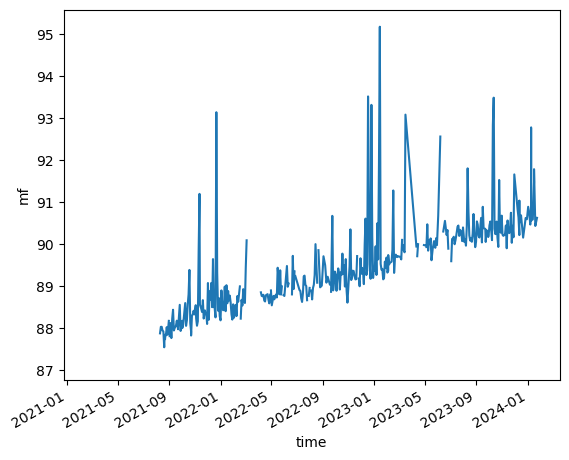

In [38]:
ds.mf.plot()